In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("Instagram data.csv",encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves   
0         3920       2586           1028           619          56     98  \
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows   
0         9       5    162              35        2  \
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption   
0  Here are some of the most important data visua...  \
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [5]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


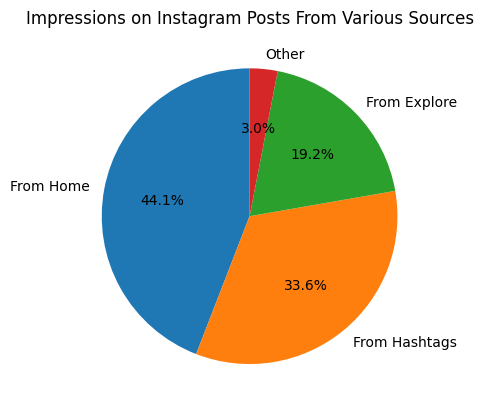

In [7]:
import matplotlib.pyplot as plt


home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()


labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']


val = [home, hashtags, explore, other]


plt.pie(val, labels=labels,autopct='%1.1f%%',  startangle=90)


plt.title('Impressions on Instagram Posts From Various Sources')


plt.show()

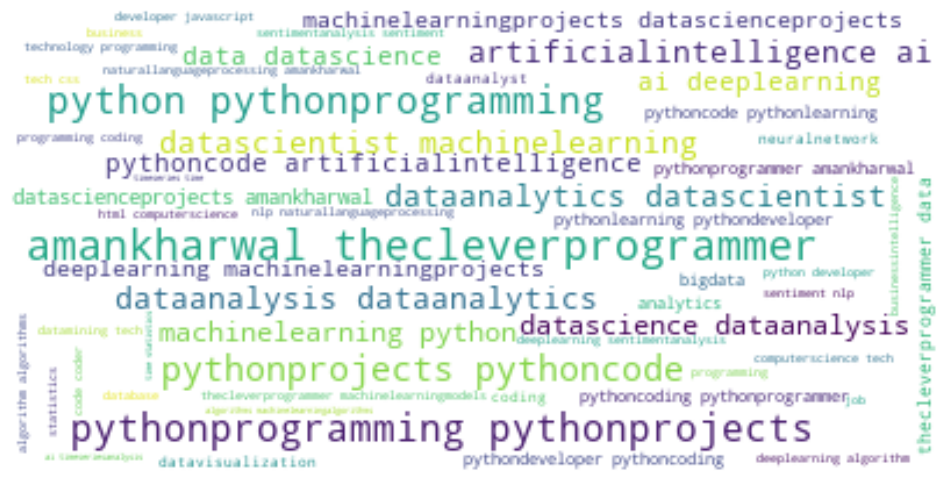

In [8]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
x = data.drop(['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Caption', 'Hashtags'], axis=1)
y = data['Impressions']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [11]:
model=RandomForestRegressor(n_estimators=4,random_state=90)

In [12]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=4, random_state=90)

In [13]:
model.score(x_test,y_test)

0.9754540271070257

In [14]:
model.predict([[5,525,24,51,600,800,200]])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([11104.75])

In [21]:

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42) 
model.fit(xtrain, ytrain)  


def get_user_input():
    try:
        likes = float(input("Enter the number of Likes: "))
        saves = float(input("Enter the number of Saves: "))
        comments = float(input("Enter the number of Comments: "))
        shares = float(input("Enter the number of Shares: "))
        profile_visits = float(input("Enter the number of Profile Visits: "))
        follows = float(input("Enter the number of Follows: "))
        impression = float(input("Enter the number of impression: "))

        return [likes, saves, comments, shares, profile_visits, follows,impression]
    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return get_user_input()


user_input_list = get_user_input()


if len(user_input_list) != 7:
    print("Error: Please provide values for all 7 features.")
else:
   
    user_input_array = np.array([user_input_list])

   
    predicted_score = model.predict(user_input_array)

    
    print("Impression Score:", predicted_score)
   


Enter the number of Likes: 13
Enter the number of Saves: 12
Enter the number of Comments: 24
Enter the number of Shares: 25
Enter the number of Profile Visits: 35
Enter the number of Follows: 34
Enter the number of impression: 200
Impression Score: [4991.56]


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
